### Clustering analysis


#### Agenda

1. Introduction to unsupervised learning
2. Clustering
3. Similarity  or distance calculation
4. Clustering as an optimization function
5. Types of clustering methods
6. Partioning cluster - KMeans and meanshift
7. Hierachial clustering - Aggolmative
8. Density based clustering - DBSCAN
9. Measuring the perfoemance of the clustering
10. Comparing all the  clustering methods

### 1. Introduction to Unsupervised learning

1. Unsupervised learning is  a type of machine learning to draw inferances from the unlabelled data
2. Model tries to find the relationship between the data
3. Most common unsupervised learning method is clustering used for exploratory data analysis to find the hidden patterns or grouping the data 

### 2. Clustering 

1. A learning technique to group the set of objects in such a way that the objects in the group are similar to 
eachother when compare to other set of objects or groups
##### Applications of clustering are as follows:
    1. Automatically oranizing the data
    2. labelling the data
    3. Understanding the hidden structure of data
    4. new clustering of groups with same news
    5. Customer segementation
    6. suggest the social groups
    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs

Generating the natural cluster

In [22]:
 x, y = make_blobs(n_features =2, n_samples = 1000, centers = 3, cluster_std = 1, random_state = 3 )

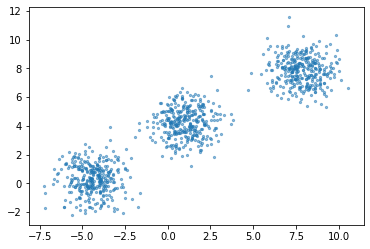

In [23]:
plt.scatter(x[:,0], x[:,1], s = 5, alpha = 0.5)

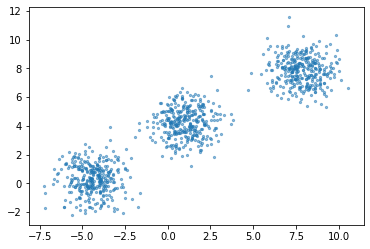

In [27]:
v,w = make_blobs(n_features = 2, n_samples = 1000, centers = 3, cluster_std = 1, random_state = 3)
plt.scatter(v[:,0], v[:,1], s = 5, alpha = 0.5)

### 3.  Distnace and similaarity function

1. Data belonging to same cluster are similar and data belonging to different cluster are different.
2. We need to measure the distance and similarity  between the data
3. This can be achieved by using below techniques
    Minkowiski breed distance calculation 
    
         where p for manhatten =1, Eulicdian = 2
      

<img src = "Capture.jpg"/>

In [29]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

In [38]:
m = [[1,1],[5,5], [2,5]]
euclidean_distances(m,m)

array([[0.        , 5.65685425, 4.12310563],
       [5.65685425, 0.        , 3.        ],
       [4.12310563, 3.        , 0.        ]])

In [31]:
from math import sqrt

In [34]:
euclidan_distance = sqrt((1-5)**2 +(1-5)**2)
euclidan_distance

5.656854249492381

In [39]:
euclidean_distances(m,[[1,0]])

array([[1.        ],
       [6.40312424],
       [5.09901951]])

In [40]:
manhattan_distances(m,m)

array([[0., 8., 5.],
       [8., 0., 3.],
       [5., 3., 0.]])

In [41]:
cosine_distances(m,m)

array([[0.00000000e+00, 2.22044605e-16, 8.08549700e-02],
       [2.22044605e-16, 0.00000000e+00, 8.08549700e-02],
       [8.08549700e-02, 8.08549700e-02, 0.00000000e+00]])

### 4. Clustering as an optimization problem

1. Maximize the inter cluster distances
2. minimize the intra cluster distances

### 5.Types of clustering

1. Partitioning methods:
    1. partition n data into k partitions
    2. initially, random partitions are created and data gradually move across the different partition
    3. It uses the distance between the points to optimize the clusters
    4. Kmeans and shiftmean are the examples of the partition method1.
2. Hierachical methods:
    1. This methods does the hierachical  decomposition of data
    2. One approch, assume each data as the one cluster amd merge to create a bigger cluster
    3. Another approch, Assuming the whole dataset as the one cluster and splitting the cluster
3. Density based methods:
    1. All the above techniques are distance based and such methods
    can find only for spherical shapes and not suited for the clusters of other types.
    2. Continue growing the cluster untill the density exceeds the thearshold
    

### 6. Partitioning methods

Minimizing creteria  : Within cluster the sum of squares.

<img src = 'Capture1.jpg'/>

Steps for this partition process KMeans algorithm

1. intialize the k centroids
2. assign each data to nearest centroid this makes a cluster
3. recalculate the centroid : Take the mean of all the data points in the  same cluster
4. Repeat the steps 2 and 3 untill there is no data to reassign to the centriod.
    

In [48]:
from sklearn.datasets import make_blobs,make_moons

In [49]:
x, y = make_blobs(n_features =2 , n_samples = 1000, centers = 3, cluster_std = 1, random_state = 3)

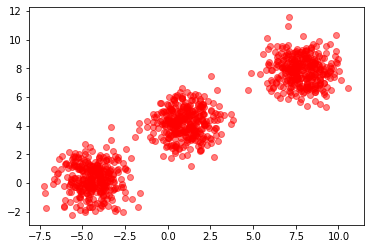

In [52]:
plt.scatter(x[:,0], x[:,1], color = 'red', alpha = 0.5)

In [54]:
from sklearn.cluster import KMeans, MeanShift

In [56]:
le = KMeans(n_clusters = 3)
le.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

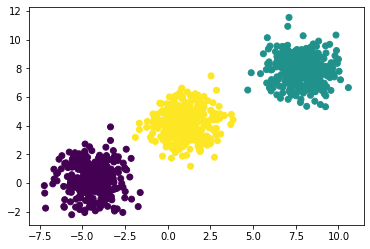

In [58]:
plt.scatter(x[:,0],x[:,1], c= le.predict(x))

In [79]:
x, y = make_moons(n_samples =  1000,noise = 0.09)

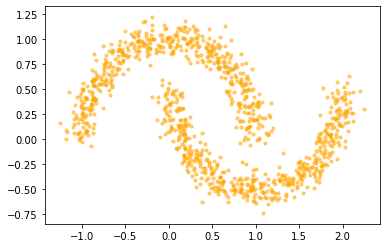

In [80]:
plt.scatter(x[:,0], x[:,1], c= 'orange', s= 10, alpha = 0.5)

In [71]:
from sklearn.cluster import KMeans


In [81]:
ke = KMeans(n_clusters = 2)

In [82]:
ke.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'corona')

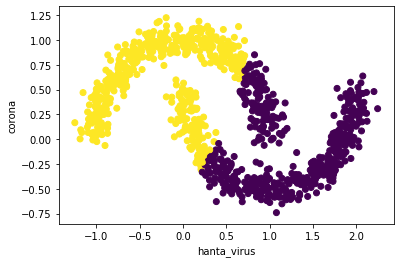

In [88]:
plt.scatter(x[:,0], x[:,1], c= ke.predict(x))
plt.xlabel("hanta_virus")
plt.ylabel("corona")


#### Limmitations of the KMeans 

1. Assumes the clusters are convex and behaves poorly for enlogated clusters
2. Probability of participation of data in multiple clusters
3. Kmeans always tries to  find local minima which depends on init value

### MeanShift algorithm

1. Centroids based on the clustering
2. Mode can be understand as the high the density  points

In [96]:
kmeans = KMeans(n_clusters= 4)

In [93]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]

In [94]:
x,_ = make_blobs(n_features =2 ,n_samples =10000, centers = centers, cluster_std =  0.6)


In [97]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

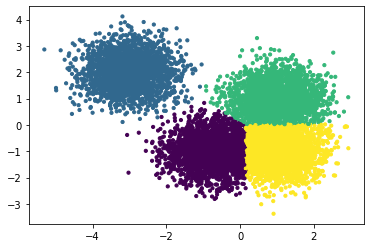

In [98]:
plt.scatter(x[:,0], x[:,1], c= kmeans.predict(x),alpha = 1, s= 10)

### 7. Hierachial Clustering

A method that you combine a similar cluster to create a cluster or spliting the cluster into smaller such that now they become better
1. There are two types of Hierchial clustering:
    1. Agglomerative Hierachial clustering, A bottom to top approch
    
    2. Divisive method, A top to bottom approch 

#### 1. Agglomerative Hierchial clustering:
    1. Starts assigning the cluster to eacch data
    2. Combine the cluster which have high similarity
    3. The differences in this methods arise due to different ways of defining distance between the clusters.
    The following sections defines serval agglomerative clustering techniques:
        1. Single Linkage technique
        2. complete linkage technique
        3. Average linkage technique
        4. Average group linkage


In [106]:
x, _ = make_moons(n_samples = 1000, noise = 0.05)

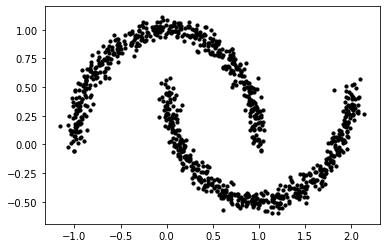

In [108]:
plt.scatter(x[:,0],x[:,1], s= 10,color = 'black' )

In [115]:
from sklearn.cluster import AgglomerativeClustering
ag =AgglomerativeClustering(linkage = 'single')


In [116]:
ag.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

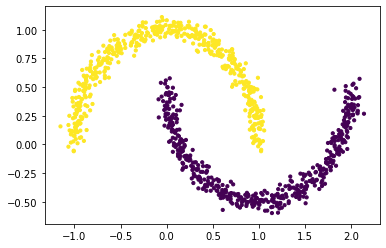

In [118]:
plt.scatter(x[:,0], x[:,1], c= ag.labels_, s= 10)

### DBSCAN Density Based clusetering

In [190]:

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=1,
                            random_state=0)

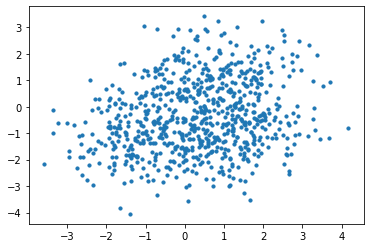

In [192]:
plt.scatter(X[:,0], X[:,1], s= 10)

In [193]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [194]:
from sklearn.cluster import DBSCAN


In [195]:
db = DBSCAN(eps = 0.3 , min_samples = 5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_



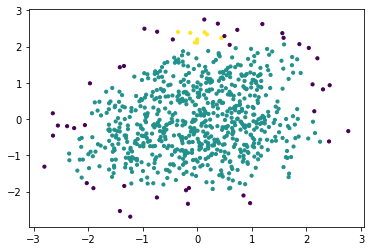

In [196]:
plt.scatter(X[:,0], X[:,1], s = 10, c= labels)

In [197]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0


### 9. Measuring the performance of the clusters

# Two forms of evaluation
1. Supervised, which uses the ground truth value for the each sample:
    1. completeness score
    2. homogenity score
2. Unsupervised learning which measures the quality of model itself:
    1. silhoutte_score
    2. calinski_harabaz_score


# completeness_score
A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [206]:
from sklearn.metrics import completeness_score
completeness_score(labels_true = [11,10,22,11], labels_pred = [0,1,1,0])

0.9999999999999999

In [208]:
from sklearn.metrics import completeness_score
completeness_score(labels_true = [11,22,22,11], labels_pred = [1,0,1,1])

0.3836885465963443

#### homogenity_score

A clusterting result satisfies homogenity of its clusters contains only data points which are the members of single class

In [209]:
from sklearn.metrics import homogeneity_score
homogeneity_score([1,1,0,0],[0,0,1,1])

1.0

A same class data is broken into two clusters

In [230]:
l,y = make_blobs(n_features = 2, n_samples =750, centers = 4, cluster_std =  1, shuffle = True, center_box = (-10.00, 10.00), random_state  = 1)

In [237]:
range_n_clusters = [2,3,4,5,6,7,8]

In [232]:
from sklearn.metrics import silhouette_score

In [238]:
for n in range_n_clusters:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(l)
#     labels_
#     kmeans_
    lables = kmeans.predict(l)
#     print(lables)
    print(n, silhouette_score(l, labels))
    

2 -0.02648378247500336
3 -0.02648378247500336
4 -0.02648378247500336
5 -0.02648378247500336
6 -0.02648378247500336
7 -0.02648378247500336
8 -0.02648378247500336


### calinski_harabaz_score

In [239]:

from sklearn.metrics import calinski_harabaz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabaz_score(X,labels))

2 529.1035709646943
3 611.716523315143
4 563.0964407958817
5 567.5727837502166
6 550.1472847535543
7 553.2991886275088
8 537.4600525979432
